In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("merged_output.csv")
df.head()

/var/folders/jk/26c0nrvd30sbw9k4_2ns250c0000gn/T/ipykernel_2109/1192622700.py:1: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("merged_output.csv")


,__typename_Rating,adminReviewedAt_Rating,attendanceMandatory_Rating,clarityRating_Rating,class_Rating,comment_Rating,createdByUser_Rating,date_Rating,difficultyRating_Rating,flagStatus_Rating,...,thumbs_Rating,thumbsDownTotal_Rating,thumbsUpTotal_Rating,wouldTakeAgain_Rating,ProfessorName,Department,SchoolName,LegacyId,NumRatings,predictedGender
0,Rating,2014-10-12 19:53:44 +0000 UTC,NaN,5.0,PH1C,genius enthusiastic really cares that we learn...,False,2014-10-12 19:51:32 +0000 UTC,3.0,UNFLAGGED,...,[],0.0,0.0,NaN,David Politzer,Science,California Institute of Technology,60323,6,Male
1,Rating,NaN,NaN,4.0,PHYS1,this guy actually sat down with me and went ov...,False,2005-12-08 02:15:58 +0000 UTC,2.0,UNFLAGGED,...,[{'computerId': '7610E82DC63E5465E4DECE93C5AB4...,0.0,2.0,NaN,David Politzer,Science,California Institute of Technology,60323,6,Male
2,Rating,NaN,NaN,2.0,PH1BC,seemed sort of scary to me lectures really had...,False,2005-06-01 22:21:35 +0000 UTC,5.0,UNFLAGGED,...,[{'computerId': '7610E82DC63E5465E4DECE93C5AB4...,1.0,0.0,NaN,David Politzer,Science,California Institute of Technology,60323,6,Male
3,Rating,NaN,NaN,5.0,PH1BC,no comments,False,2005-02-13 22:58:06 +0000 UTC,3.0,UNFLAGGED,...,[{'computerId': '2D777623F4F23069E44333A863E40...,0.0,1.0,NaN,David Politzer,Science,California Institute of Technology,60323,6,Male
4,Rating,NaN,NaN,3.0,PH1BC,he made fun of me gt o,False,2004-06-04 01:14:40 +0000 UTC,4.0,UNFLAGGED,...,[],0.0,0.0,NaN,David Politzer,Science,California Institute of Technology,60323,6,Male


In [3]:
df = pd.DataFrame(df)

df['date_Rating'] = df['date_Rating'].str.replace(' UTC', '')

# Convert the 'Date' column to datetime type with explicit format
df['date_Rating'] = pd.to_datetime(df['date_Rating'], format='%Y-%m-%d %H:%M:%S %z')

In [4]:
common_asian_names = [
    'Chen', 'Chang', 'Chao', 'Cheng', 'Cho', 'Choi', 'Chong', 'Chou', 'Chow', 'Chu', 'Feng', 'Gao', 'Guo', 'Ho',
    'Hsu', 'Huang', 'Jiang', 'Kim', 'Koh', 'Kuo', 'Lee', 'Leong', 'Li', 'Liang', 'Lim', 'Lin', 'Liu', 'Lu', 'Ma',
    'Ng', 'Nguyen', 'Ong', 'Park', 'Phan', 'Shen', 'Singh', 'Song', 'Tan', 'Tang', 'Wang', 'Wong', 'Wu', 'Xu',
    'Yang', 'Yao', 'Yeh', 'Yen', 'Yeo', 'Yong', 'Yu', 'Yuan', 'Yuen', 'Zhang', 'Zhao', 'Zhou',
    'Patel', 'Shah', 'Khan', 'Singh', 'Sharma', 'Gupta', 'Kumar', 'Joshi', 'Desai', 'Mehta', 'Choudhury', 'Malhotra',
    'Gandhi', 'Verma', 'Reddy', 'Bose', 'Sinha', 'Rao', 'Thakur', 'Roy', 'Das', 'Pandey', 'Naidu', 'Menon', 'Iyer',
    'Nair', 'Raj', 'Chatterjee', 'Mukherjee'
]

In [5]:
def is_asian(name):
    if any(asian_name in name for asian_name in common_asian_names):
        return "Yes"
    else:
        return "No"

df['AsianProfessor'] = df['ProfessorName'].apply(is_asian)

In [6]:
# Extract unique elements from department
unique_elements = df['Department'].unique()

# Create a new DataFrame with unique elements
dept_df = pd.DataFrame(unique_elements, columns=['Departments'])

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

STEM = ['Science', 'Computer Science','Geography','Technology','Mathematics', 'Chemistry', 'Engineering', 'Physics', 'Biology', 'Geology', 'Astronomy', 'Information Science', 'Electrical Engineering', 'Cognitive Science', 'Mechanical Engineering','Engineering','chemistry']
BUSINESS = ['Economics', 'Business', 'Finance', 'Marketing', 'International Studies', 'Criminal Justice','Accounts','Human Resources','Management']
HUMANITIES = ['Philosophy', 'Languages', 'Humanities', 'English', 'History', 'Theology', 'Art History','Classics', 'Anthropology', 'Linguistics', 'Literature', 'Religious Studies','Linguistics', 'Classics','Literature', 'Religion', 'Comparative Literature']
OTHERS = ['Culinary Arts', 'Psychology', 'Education', 'Health Science', 'Communication', 'Technology', 'Film']

# Combine all categories
all_categories = STEM + BUSINESS + HUMANITIES + OTHERS

# Create a DataFrame with categories
category_df = pd.DataFrame({'Departments': all_categories})

# Define the labels for each category
category_labels = ['STEM'] * len(STEM) + ['BUSINESS'] * len(BUSINESS) + ['HUMANITIES'] * len(HUMANITIES) + ['OTHERS'] * len(OTHERS)

# Add the labels to the DataFrame
category_df['Category'] = category_labels

# Create a TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Vectorize the department names from the first 50 records in df
X_train = tfidf_vectorizer.fit_transform(df['Department'][:50])

# Encode the category labels for the first 50 records
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(category_df['Category'])

# Train a Support Vector Machine (SVM) classifier on the first 50 records
svm_classifier = SVC(kernel='linear')
svm_classifier.fit(X_train, y_train)

# Predict categories for the first 50 records
predicted_categories_train = svm_classifier.predict(X_train)

# Map the predicted categories back to the department names for the first 50 records
predicted_category_labels_train = label_encoder.inverse_transform(predicted_categories_train)

# Create the 'Predicted_Category' column in the DataFrame for the first 50 records
df['Predicted_Category'] = ''

# Add the predicted categories to the 'Predicted_Category' column for the first 50 records
df.loc[:49, 'Predicted_Category'] = predicted_category_labels_train

# Calculate accuracy for the first 50 records
accuracy_train = accuracy_score(y_train, predicted_categories_train)

# Display the accuracy for the first 50 records
print(f"Accuracy for the first 50 records: {accuracy_train}")

# Vectorize the department names from the remaining 1200 records in df
X_test = tfidf_vectorizer.transform(df['Department'][50:])

# Predict categories for the remaining 1200 records
predicted_categories_test = svm_classifier.predict(X_test)

# Map the predicted categories back to the department names for the remaining 1200 records
predicted_category_labels_test = label_encoder.inverse_transform(predicted_categories_test)

# Add the predicted categories to the 'Predicted_Category' column for the remaining 1200 records
df.loc[50:, 'Predicted_Category'] = predicted_category_labels_test

# Display the resulting DataFrame with the predicted categories
df.head(10)


Accuracy for the first 50 records: 0.74


,__typename_Rating,adminReviewedAt_Rating,attendanceMandatory_Rating,clarityRating_Rating,class_Rating,comment_Rating,createdByUser_Rating,date_Rating,difficultyRating_Rating,flagStatus_Rating,...,thumbsUpTotal_Rating,wouldTakeAgain_Rating,ProfessorName,Department,SchoolName,LegacyId,NumRatings,predictedGender,AsianProfessor,Predicted_Category
0,Rating,2014-10-12 19:53:44 +0000 UTC,NaN,5.0,PH1C,genius enthusiastic really cares that we learn...,False,2014-10-12 19:51:32+00:00,3.0,UNFLAGGED,...,0.0,NaN,David Politzer,Science,California Institute of Technology,60323,6,Male,No,STEM
1,Rating,NaN,NaN,4.0,PHYS1,this guy actually sat down with me and went ov...,False,2005-12-08 02:15:58+00:00,2.0,UNFLAGGED,...,2.0,NaN,David Politzer,Science,California Institute of Technology,60323,6,Male,No,STEM
2,Rating,NaN,NaN,2.0,PH1BC,seemed sort of scary to me lectures really had...,False,2005-06-01 22:21:35+00:00,5.0,UNFLAGGED,...,0.0,NaN,David Politzer,Science,California Institute of Technology,60323,6,Male,No,STEM
3,Rating,NaN,NaN,5.0,PH1BC,no comments,False,2005-02-13 22:58:06+00:00,3.0,UNFLAGGED,...,1.0,NaN,David Politzer,Science,California Institute of Technology,60323,6,Male,No,STEM
4,Rating,NaN,NaN,3.0,PH1BC,he made fun of me gt o,False,2004-06-04 01:14:40+00:00,4.0,UNFLAGGED,...,0.0,NaN,David Politzer,Science,California Institute of Technology,60323,6,Male,No,STEM
5,Rating,NaN,NaN,5.0,PH2AB,amazing philosophy toward teaching concerned w...,False,2002-08-20 15:23:20+00:00,4.0,UNFLAGGED,...,1.0,NaN,David Politzer,Science,California Institute of Technology,60323,6,Male,No,STEM
6,Rating,2012-04-06 22:51:02 +0000 UTC,NaN,5.0,BI150,amazing prof,False,2012-04-06 22:49:45+00:00,3.0,UNFLAGGED,...,0.0,NaN,Henry Lester,Science,California Institute of Technology,90542,13,Male,No,STEM
7,Rating,2011-11-08 19:44:54 +0000 UTC,NaN,5.0,CNS150,lester is an amazing and caring educator he ma...,False,2011-11-08 19:25:53+00:00,4.0,UNFLAGGED,...,0.0,NaN,Henry Lester,Science,California Institute of Technology,90542,13,Male,No,STEM
8,Rating,NaN,NaN,3.0,BI1,no comments,False,2006-10-06 04:14:09+00:00,2.0,UNFLAGGED,...,0.0,NaN,Henry Lester,Science,California Institute of Technology,90542,13,Male,No,STEM
9,Rating,NaN,NaN,5.0,BI1,extremely interested in the students tries to ...,False,2005-05-12 18:42:36+00:00,3.0,UNFLAGGED,...,0.0,NaN,Henry Lester,Science,California Institute of Technology,90542,13,Male,No,STEM


In [8]:
public_universities = [
    "University of California Berkeley (UCB)",
    "University of California, Los Angeles (UCLA)",
    "University of California, Davis (UCD)",
    "University of California, San Diego (UCSD)",
    "University of California, Santa Barbara (UCSB)",
    "University of Illinois at Urbana-Champaign",
    "University of Texas at Austin",
    "University of Washington",
    "University of Wisconsin-Madison",
    "Pennsylvania State University",
    "Michigan State University",
    "Ohio State University",
    "University of North Carolina, Chapel Hill",
    "Texas A&M University",
    "Washington University in St. Louis",
    "University of Florida",
    "University of Maryland, College Park",
    "Arizona State University",
    "University of Minnesota, Twin Cities",
    "University of Pittsburgh",
    "University of Massachusetts, Amherst",
    "University of California, Riverside (UCR)",
    "University of Colorado at Boulder",
    "University of California, Irvine (UCI)",
    "North Carolina State University",
    "University of Arizona",
    "University of Georgia",
    "University of California, Santa Cruz (UCSC)",
    "University of Hawai'i at Manoa",
    "Stony Brook University",
    "University of California, Riverside (UCR)",
    "Iowa State University",
    "Colorado State University",
    "University of Kansas",
    "Washington State University",
    "University of Utah",
    "University of Connecticut",
    "University of Tennessee, Knoxville",
    "Florida State University",
    "Colorado School of Mines",
    "Missouri University of Science and Technology",
    "University at Buffalo SUNY",
    "University of Iowa",
    "University of Delaware",
    "Oregon State University",
    "University of Texas Dallas",
    "City University of New York"
]

# Function to categorize universities as public or private
def categorize_university(university_name):
    if any(public_uni in university_name for public_uni in public_universities):
        return "Public"
    else:
        return "Private"

# Add a new column 'University_Category' to df
df['University_Category'] = df['SchoolName'].apply(categorize_university)

# Display the updated DataFrame
print(df[['SchoolName', 'University_Category']].head(50))


                            SchoolName University_Category
0   California Institute of Technology             Private
1   California Institute of Technology             Private
2   California Institute of Technology             Private
3   California Institute of Technology             Private
4   California Institute of Technology             Private
5   California Institute of Technology             Private
6   California Institute of Technology             Private
7   California Institute of Technology             Private
8   California Institute of Technology             Private
9   California Institute of Technology             Private
10  California Institute of Technology             Private
11  California Institute of Technology             Private
12  California Institute of Technology             Private
13  California Institute of Technology             Private
14  California Institute of Technology             Private
15  California Institute of Technology             Priva

In [9]:
grades_1999_to_2019 = pd.DataFrame(df[(df['date_Rating'].dt.year >= 1999) & (df['date_Rating'].dt.year <= 2019)])
grades_2020_to_2024 = pd.DataFrame(df[(df['date_Rating'].dt.year >= 2020) & (df['date_Rating'].dt.year <= 2024)])

In [10]:
grades_1999_to_2019['grade_Rating'].unique()

array([nan, 'Not sure yet', 'Incomplete', 'B', 'B+', 'Not_Sure_Yet', 'A+',
       'Rather not say', 'A', 'B-', 'Pass', 'C', 'A-', 'C-', 'C+',
       'Audit/No Grade', 'D', 'Drop/Withdrawal', 'D-', 'Rather_Not_Say',
       'Audit/No_Grade', 'F', 'D+', 'Fail', 'wombo combo', 'wumbo'],
      dtype=object)

In [11]:
grades_1999_to_2019 = grades_1999_to_2019.dropna(subset=['grade_Rating'])
grades_2019_to_2024 = grades_2020_to_2024.dropna(subset=['grade_Rating'])

In [12]:
grade_mapping = {'A+': 4, 'A':4, 'A-': 3.5, 'B+':3, 'B': 3, 'B-': 2.5, 'C+' : 2, 'C': 2, 'C-':1.5, 'D': 1, 'Fail': 0,'F': 0}

# Convert 'grade_Rating' column to numeric format based on the mapping
grades_1999_to_2019.loc[:, 'grade_Rating'] = grades_1999_to_2019['grade_Rating'].map(grade_mapping)
grades_2019_to_2024.loc[:, 'grade_Rating'] = grades_2019_to_2024['grade_Rating'].map(grade_mapping)

/var/folders/jk/26c0nrvd30sbw9k4_2ns250c0000gn/T/ipykernel_2109/2801095805.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  grades_2019_to_2024.loc[:, 'grade_Rating'] = grades_2019_to_2024['grade_Rating'].map(grade_mapping)


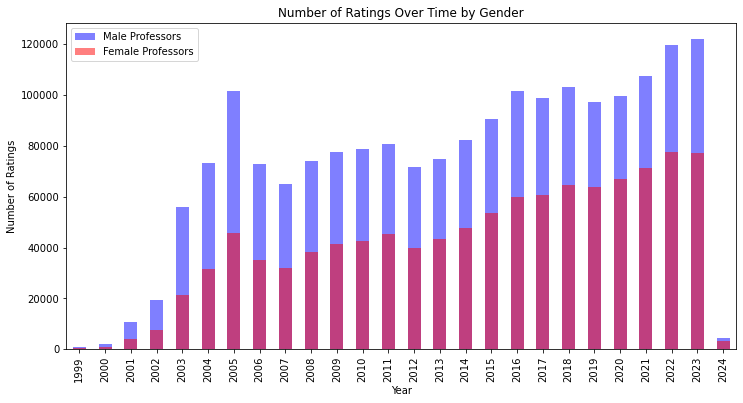

Average Ratings by Male Professors Over Time:
 date_Rating
1999         NaN
2000         NaN
2001         NaN
2002         NaN
2003         NaN
2004         NaN
2005         NaN
2006         NaN
2007         NaN
2008         NaN
2009         NaN
2010         NaN
2011         NaN
2012         NaN
2013         NaN
2014         NaN
2015         NaN
2016    0.709951
2017    0.714891
2018    0.722024
2019    0.683392
2020    0.658387
2021    0.645994
2022    0.936635
2023    0.999927
2024    0.999336
Name: wouldTakeAgain_Rating, dtype: float64

Average Ratings by Female Professors Over Time:
 date_Rating
1999         NaN
2000         NaN
2001         NaN
2002         NaN
2003         NaN
2004         NaN
2005         NaN
2006         NaN
2007         NaN
2008         NaN
2009         NaN
2010         NaN
2011         NaN
2012         NaN
2013         NaN
2014         NaN
2015         NaN
2016    0.690952
2017    0.697817
2018    0.701445
2019    0.654407
2020    0.635367
2021    0.625112
20

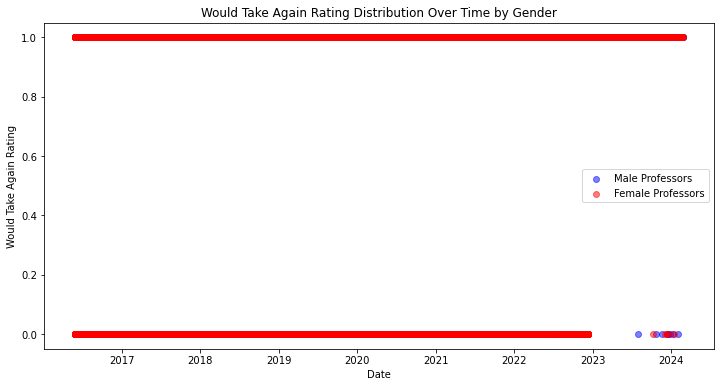

In [13]:
import matplotlib.pyplot as plt


male_df = df[df['predictedGender'] == 'Male']

female_df = df[df['predictedGender'] == 'Female']

# Plotting Trends Over Time for Male Professors
plt.figure(figsize=(12, 6))
male_df['date_Rating'].dt.year.value_counts().sort_index().plot(kind='bar', color='blue', alpha=0.5, label='Male Professors')
female_df['date_Rating'].dt.year.value_counts().sort_index().plot(kind='bar', color='red', alpha=0.5, label='Female Professors')
plt.xlabel('Year')
plt.ylabel('Number of Ratings')
plt.title('Number of Ratings Over Time by Gender')
plt.legend()
plt.show()

# Calculating Average Ratings Over Time Intervals for Male Professors
average_ratings_male = male_df.groupby(male_df['date_Rating'].dt.year)['wouldTakeAgain_Rating'].mean()
print("Average Ratings by Male Professors Over Time:\n", average_ratings_male)

# Calculating Average Ratings Over Time Intervals for Female Professors
average_ratings_female = female_df.groupby(female_df['date_Rating'].dt.year)['wouldTakeAgain_Rating'].mean()
print("\nAverage Ratings by Female Professors Over Time:\n", average_ratings_female)

# Analyzing Ratings Distribution Over Time for Male Professors
plt.figure(figsize=(12, 6))
plt.scatter(male_df['date_Rating'], male_df['wouldTakeAgain_Rating'], alpha=0.5, color='blue', label='Male Professors')
plt.scatter(female_df['date_Rating'], female_df['wouldTakeAgain_Rating'], alpha=0.5, color='red', label='Female Professors')
plt.xlabel('Date')
plt.ylabel('Would Take Again Rating')
plt.title('Would Take Again Rating Distribution Over Time by Gender')
plt.legend()
plt.show()

In [14]:
df.describe()

,clarityRating_Rating,difficultyRating_Rating,helpfulRating_Rating,legacyId_Rating,textbookUse_Rating,thumbsDownTotal_Rating,thumbsUpTotal_Rating,wouldTakeAgain_Rating,LegacyId,NumRatings
count,2.967600e+06,2.967600e+06,2.967600e+06,2.967600e+06,2.515495e+06,2.967600e+06,2.967600e+06,1.202825e+06,2.967600e+06,2.967600e+06
mean,3.652856e+00,3.012952e+00,3.686165e+00,2.352545e+07,2.702768e+00,3.294100e-01,5.767752e-01,7.445788e-01,1.160729e+06,9.084621e+01
std,1.490245e+00,1.245152e+00,1.509440e+00,1.074216e+07,2.129707e+00,2.445038e+00,4.187278e+00,4.360979e-01,8.756415e+05,3.271672e+02
min,1.000000e+00,1.000000e+00,-1.000000e+00,6.000000e+01,-1.000000e+00,-1.000000e+00,-1.000000e+00,0.000000e+00,4.700000e+01,0.000000e+00
25%,2.000000e+00,2.000000e+00,2.000000e+00,1.585092e+07,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.247150e+05,1.500000e+01
50%,4.000000e+00,3.000000e+00,4.000000e+00,2.491652e+07,3.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.049763e+06,3.600000e+01
75%,5.000000e+00,4.000000e+00,5.000000e+00,3.287393e+07,5.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.939739e+06,8.200000e+01
max,5.000000e+00,5.000000e+00,5.000000e+00,3.900157e+07,5.000000e+00,9.070000e+02,4.015000e+03,1.000000e+00,2.987551e+06,5.987000e+03


In [15]:
df.head(5)

,__typename_Rating,adminReviewedAt_Rating,attendanceMandatory_Rating,clarityRating_Rating,class_Rating,comment_Rating,createdByUser_Rating,date_Rating,difficultyRating_Rating,flagStatus_Rating,...,wouldTakeAgain_Rating,ProfessorName,Department,SchoolName,LegacyId,NumRatings,predictedGender,AsianProfessor,Predicted_Category,University_Category
0,Rating,2014-10-12 19:53:44 +0000 UTC,NaN,5.0,PH1C,genius enthusiastic really cares that we learn...,False,2014-10-12 19:51:32+00:00,3.0,UNFLAGGED,...,NaN,David Politzer,Science,California Institute of Technology,60323,6,Male,No,STEM,Private
1,Rating,NaN,NaN,4.0,PHYS1,this guy actually sat down with me and went ov...,False,2005-12-08 02:15:58+00:00,2.0,UNFLAGGED,...,NaN,David Politzer,Science,California Institute of Technology,60323,6,Male,No,STEM,Private
2,Rating,NaN,NaN,2.0,PH1BC,seemed sort of scary to me lectures really had...,False,2005-06-01 22:21:35+00:00,5.0,UNFLAGGED,...,NaN,David Politzer,Science,California Institute of Technology,60323,6,Male,No,STEM,Private
3,Rating,NaN,NaN,5.0,PH1BC,no comments,False,2005-02-13 22:58:06+00:00,3.0,UNFLAGGED,...,NaN,David Politzer,Science,California Institute of Technology,60323,6,Male,No,STEM,Private
4,Rating,NaN,NaN,3.0,PH1BC,he made fun of me gt o,False,2004-06-04 01:14:40+00:00,4.0,UNFLAGGED,...,NaN,David Politzer,Science,California Institute of Technology,60323,6,Male,No,STEM,Private


In [16]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics.pairwise import cosine_similarity
from scispy.sparse.linalg import svds

# Data Preprocessing
df['difficultyRating_Rating'] = df['difficultyRating_Rating'].fillna(df['difficultyRating_Rating'].mean())
df['clarityRating_Rating'] = df['clarityRating_Rating'].fillna(df['clarityRating_Rating'].mean())

# Extract features from comments
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(df['comment_Rating'].fillna(''))

In [17]:
# Calculate average clarity rating for each professor
df['average_clarity_rating'] = df.groupby('ProfessorName')['clarityRating_Rating'].transform('mean')

# Find the highest rated professor for each university and department
highest_rated_professors = df.loc[df.groupby(['SchoolName', 'Department'])['average_clarity_rating'].idxmax()]

# Display the highest rated professor for each university and department
for _, row in highest_rated_professors.iterrows():
    print(f'The highest rated professor at {row["SchoolName"]} in the {row["Department"]} department is {row["ProfessorName"]} with an average clarity rating of {row["average_clarity_rating"]:.2f}')

The highest rated professor at Academy of Art University in the Computer Science department is Dan Eriksson with an average clarity rating of 3.29
The highest rated professor at Acadia University in the Social Science department is James Sacouman with an average clarity rating of 3.88
The highest rated professor at Adrian College in the Languages department is John Eipper with an average clarity rating of 4.26
The highest rated professor at Adrian College in the Sociology department is William Tregea with an average clarity rating of 3.08
The highest rated professor at Adrian College in the Theater department is Suzanne Carter Smith with an average clarity rating of 3.75
The highest rated professor at Albion College in the English department is Judy Lockyer with an average clarity rating of 4.27
The highest rated professor at Albion College in the Mathematics department is Robert Messer with an average clarity rating of 3.11
The highest rated professor at Albion College in the Politica

In [18]:
# Calculate average clarity rating for each professor
df['average_clarity_rating'] = df.groupby('ProfessorName')['clarityRating_Rating'].transform('mean')

# Find the highest rated professor for each university and department
highest_rated_professors = df.loc[df.groupby(['SchoolName', 'Predicted_Category'])['average_clarity_rating'].idxmax()]

# Display the highest rated professor for each university and department
for _, row in highest_rated_professors.iterrows():
    print(f'The highest rated professor at {row["SchoolName"]} in the {row["Predicted_Category"]} department is {row["ProfessorName"]} with an average clarity rating of {row["average_clarity_rating"]:.2f}')

The highest rated professor at Academy of Art University in the BUSINESS department is Dan Eriksson with an average clarity rating of 3.29
The highest rated professor at Acadia University in the STEM department is James Sacouman with an average clarity rating of 3.88
The highest rated professor at Adrian College in the HUMANITIES department is John Eipper with an average clarity rating of 4.26
The highest rated professor at Albion College in the HUMANITIES department is Judy Lockyer with an average clarity rating of 4.27
The highest rated professor at Albion College in the STEM department is Andrew Grossman with an average clarity rating of 4.42
The highest rated professor at Algonquin College in the BUSINESS department is Rex Woollard with an average clarity rating of 4.46
The highest rated professor at Algonquin College in the HUMANITIES department is Paul Khoury with an average clarity rating of 2.15
The highest rated professor at Alma College in the BUSINESS department is Myles McN

In [19]:
# Calculate average clarity rating for each professor
df['average_clarity_rating'] = df.groupby('ProfessorName')['clarityRating_Rating'].transform('mean')

# Get the top 5 professors from each predicted category
top_professors = df.groupby('Predicted_Category').apply(
    lambda x: x.sort_values(by='average_clarity_rating', ascending=False).head(5)
).reset_index(drop=True)

# Display the top 5 professors from each predicted category
for category in top_professors['Predicted_Category'].unique():
    print(f'Top professors in the {category} category:')
    category_professors = top_professors[top_professors['Predicted_Category'] == category]
    for _, row in category_professors.iterrows():
        print(f'{row["ProfessorName"]} from {row["SchoolName"]} with an average clarity rating of {row["average_clarity_rating"]:.2f}')
    print()

Top professors in the BUSINESS category:
Rebecca Schley from CUNY Queens College with an average clarity rating of 5.00
Dominik Michels from Stanford University with an average clarity rating of 5.00
Chris Piech from Stanford University with an average clarity rating of 5.00
Chris Piech from Stanford University with an average clarity rating of 5.00
Chris Piech from Stanford University with an average clarity rating of 5.00

Top professors in the HUMANITIES category:
Niles Pierce from California Institute of Technology with an average clarity rating of 5.00
Carol Day from Georgetown University with an average clarity rating of 5.00
Amelia Kahl-Avdic from Georgetown University with an average clarity rating of 5.00
Rita Sue Guenther from Georgetown University with an average clarity rating of 5.00
Maureen Walsh from Georgetown University with an average clarity rating of 5.00

Top professors in the OTHERS category:
Thomas Drwiega from Rutgers - State University of New Jersey with an ave

In [20]:
# Take a random sample of 10,000 rows from the dataset
sampled_df = df.sample(n=10000, random_state=42)

# Data Preprocessing
sampled_df['difficultyRating_Rating'] = sampled_df['difficultyRating_Rating'].fillna(sampled_df['difficultyRating_Rating'].mean())
sampled_df['clarityRating_Rating'] = sampled_df['clarityRating_Rating'].fillna(sampled_df['clarityRating_Rating'].mean())

# Create a utility matrix with courses as rows and professors as columns
utility_matrix = sampled_df.pivot_table(index='class_Rating', columns='ProfessorName', values='clarityRating_Rating', aggfunc='mean').fillna(0)

In [21]:
# Perform matrix factorization using SVD
svd = TruncatedSVD(n_components=5)
latent_matrix = svd.fit_transform(utility_matrix)

# Calculate the cosine similarity between courses
course_similarity = cosine_similarity(latent_matrix)

# Create a DataFrame for course similarity
course_similarity_df = pd.DataFrame(course_similarity, index=utility_matrix.index, columns=utility_matrix.index)

def recommend_professors(course_code, top_n=5):
    # Get the similarity scores for the given course
    similar_courses = course_similarity_df[course_code].sort_values(ascending=False)
    
    # Get the top N similar courses
    top_courses = similar_courses.head(top_n + 1).index.tolist()
    
    # Exclude the input course itself
    top_courses = [course for course in top_courses if course != course_code]
    
    # Get the highest-rated professors from these similar courses
    recommendations = sampled_df[sampled_df['class_Rating'].isin(top_courses)]
    top_professors = recommendations.groupby(['ProfessorName', 'SchoolName']).agg({
        'clarityRating_Rating': 'mean',
        'Department': 'first',
        'class_Rating': 'first'
    }).sort_values(by='clarityRating_Rating', ascending=False).head(top_n)
    
    return top_professors

In [25]:
# Example usage
course_code = 'ECE6040'  
recommended_professors = recommend_professors(course_code)
print(f"Top recommended professors for the course {course_code}:")
print(recommended_professors)

Top recommended professors for the course ECE6040:
                                                            clarityRating_Rating  \
ProfessorName     SchoolName                                                       
Jeffery Rubin     Rutgers - State University of New Jersey                   5.0   
Begona Orive-Abad University of Minnesota - Twin Cities                      3.0   
Tatyana Grenkov   Stony Brook University (SUNY)                              2.5   
Jacques Maurice   Carleton University                                        1.0   

                                                                      Department  \
ProfessorName     SchoolName                                                       
Jeffery Rubin     Rutgers - State University of New Jersey             Economics   
Begona Orive-Abad University of Minnesota - Twin Cities     Spanish & Portuguese   
Tatyana Grenkov   Stony Brook University (SUNY)                          English   
Jacques Maurice   Carlet

In [24]:
sampled_df.head(5)

,__typename_Rating,adminReviewedAt_Rating,attendanceMandatory_Rating,clarityRating_Rating,class_Rating,comment_Rating,createdByUser_Rating,date_Rating,difficultyRating_Rating,flagStatus_Rating,...,ProfessorName,Department,SchoolName,LegacyId,NumRatings,predictedGender,AsianProfessor,Predicted_Category,University_Category,average_clarity_rating
1226117,Rating,2008-01-29 23:49:03 +0000 UTC,NaN,5.0,INDV101,she very passionate about what she teaches but...,False,2007-12-12 18:40:36+00:00,1.0,UNFLAGGED,...,Amy Fountain,Languages,University of Arizona,644785,199,Female,No,HUMANITIES,Public,3.783920
585995,Rating,2013-03-29 00:55:18 +0000 UTC,NaN,4.0,ECE6040,a very knowledgeable professor her accent may ...,False,2013-03-29 00:25:18+00:00,3.0,UNFLAGGED,...,Vesna Zderic,Engineering,George Washington University,1760280,5,Female,No,HUMANITIES,Private,3.000000
2796440,Rating,NaN,NaN,2.0,UGC211,bad teacher he demeans students whom he does n...,False,2004-10-24 15:09:48+00:00,1.0,UNFLAGGED,...,David Johnson,Languages,University at Buffalo (SUNY Buffalo),140727,23,Male,No,HUMANITIES,Private,3.540785
1367219,Rating,2021-12-09 14:08:35 +0000 UTC,non mandatory,5.0,HDFS3430,a very respectable and knowledgeable professor...,False,2021-12-06 17:36:30+00:00,2.0,UNFLAGGED,...,Russell Ravert,Human Development,University of Missouri - Columbia,1698828,3,Male,No,HUMANITIES,Private,4.000000
1548162,Rating,2012-11-07 18:40:56 +0000 UTC,NaN,2.0,BUSX170,completely boring and likes to ramble on will ...,False,2012-11-07 17:20:33+00:00,3.0,UNFLAGGED,...,Paul Coulis,Business,Indiana University Bloomington,1197121,13,Male,No,HUMANITIES,Private,2.769231
